<a href="https://colab.research.google.com/github/carbform/Climate_Data_Plotting/blob/main/point_map_cartopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import os, sys
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.transforms import offset_copy
import numpy as np
#matplotlib.rcParams.update({'font.size': 14})
import matplotlib.patheffects as pe
!pip install geopandas
!pip install contextily
!pip install rasterio
!pip uninstall shapely
!pip install shapely --no-binary shapely
!pip install proplot
!pip install cartopy




#from matplotlib_scalebar.scalebar import ScaleBar

import geopandas as gpd
import contextily as ctx
import rasterio
from shapely.geometry import Point, Polygon
import proplot as plot


import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: Shapely 1.8.2
Uninstalling Shapely-1.8.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.8.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.8.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Shapely-1.8.2.tar.gz (198 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.2-cp37-cp37m-linux_x86_64.whl size=669032 sha256=9726e35ac996148075bc10a12b2e282ad251a9f1019027df0528610042a82c28
  

In [ ]:
plot.rc.reset()

# Font properties (self-explanatory)
#plot.register_fonts('/home/sarat/anaconda3/pkgs/proplot-0.8.1-pyhd8ed1ab_0/site-packages/proplot/fonts/IBMPlexSans-SemiBold.ttf')
#plot.rc['font.name'] = 'IBM Plex Sans'
plot.rc['font.weight']='bold'
plot.rc['font.size']=6

# Tick propreties (self-explanatory)
plot.rc['tick.labelsize']=5
plot.rc['xtick.minor.visible'] =   False
plot.rc['ytick.minor.visible']=   False
plot.rc['tick.len']=2
plot.rc['tick.dir']= 'out'
plot.rc['xtick.major.size']=1
plot.rc['ytick.major.size']=1

# Grid properties (self-explanatory)
plot.rc['grid']=False
plot.rc['grid.linewidth']=0.25
#plot.rc['grid.linestyle']=(0, (5, 10))

# Misc
plot.rc['meta.width']=1.5 # Line width in the plots
plot.rc['subplots.tight']= True # Tight layout for the subplots
plot.rc['colorbar.insetpad']='0.5em' # Insert whitespace around the colorbar

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Vandana_Map/stationTrend.csv')


Mounted at /content/gdrive


In [ ]:

df

,Station Name,Lat,Lon
0,Cochin,9.9670,76.267
1,Visakhapatnam,17.6830,83.283
2,Mormugao,15.4167,73.800
3,Chennai,13.1000,80.300
4,Haldia,22.0300,88.100
5,Okha,22.4670,69.083
6,Paradip,20.2600,86.700
7,Port Blair,11.6830,92.767


In [ ]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['Lon'], df['Lat'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
geo_df


,Station Name,Lat,Lon,geometry
0,Cochin,9.9670,76.267,POINT (76.26700 9.96700)
1,Visakhapatnam,17.6830,83.283,POINT (83.28300 17.68300)
2,Mormugao,15.4167,73.800,POINT (73.80000 15.41670)
3,Chennai,13.1000,80.300,POINT (80.30000 13.10000)
4,Haldia,22.0300,88.100,POINT (88.10000 22.03000)
5,Okha,22.4670,69.083,POINT (69.08300 22.46700)
6,Paradip,20.2600,86.700,POINT (86.70000 20.26000)
7,Port Blair,11.6830,92.767,POINT (92.76700 11.68300)


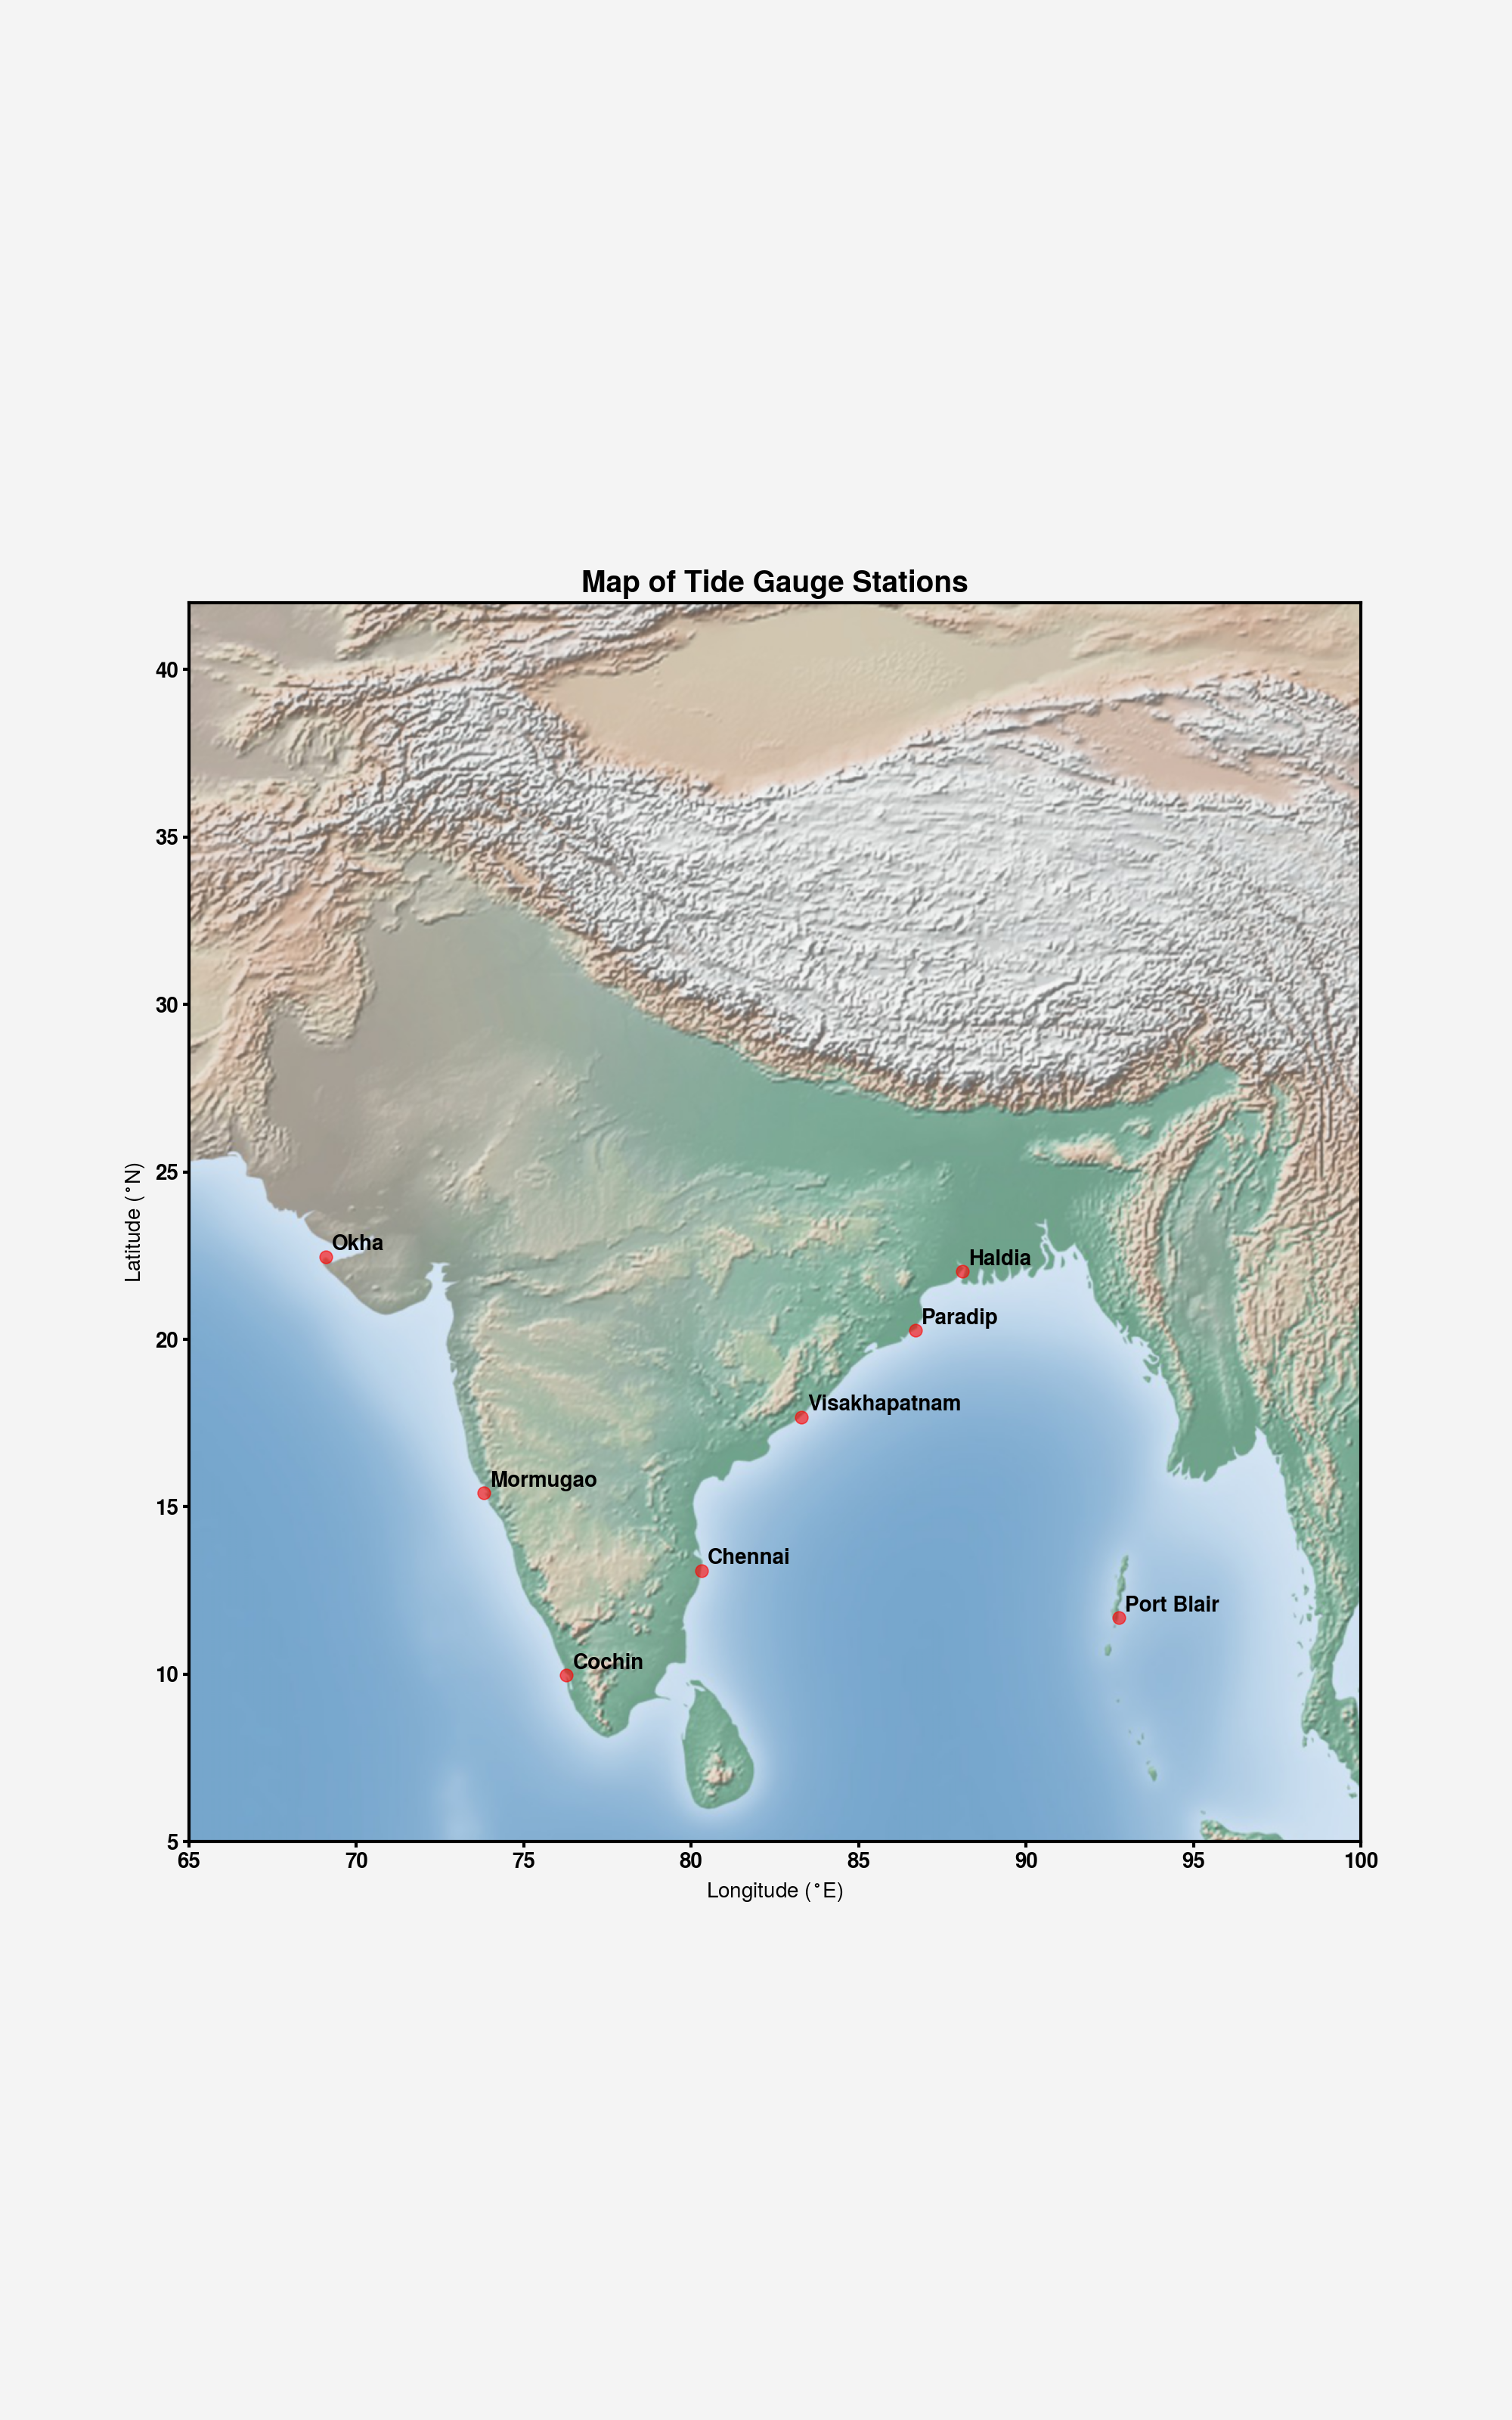

In [ ]:
# Plot
fig, ax = plt.subplots(figsize = (10,16))
m = Basemap(projection='cyl',llcrnrlat=5,urcrnrlat=42, llcrnrlon=65,urcrnrlon=100, resolution='l', 
            suppress_ticks=False)

# feature/polygons
geo_df.plot(ax=ax, c='red', alpha=0.6)


m.shadedrelief()

# add point labels
for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df['Station Name']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
    
    
ax.set_title('Map of Tide Gauge Stations', size=14, fontweight="bold")
plt.xlabel('Longitude ($^\circ$E)')
plt.ylabel('Latitude ($^\circ$N)')

#plt.show()
plt.savefig("/content/gdrive/MyDrive/Vandana_Map/stationTrend.png", dpi=300, bbox_inches ="tight", pad_inches = 0)

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<string>:6: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy a

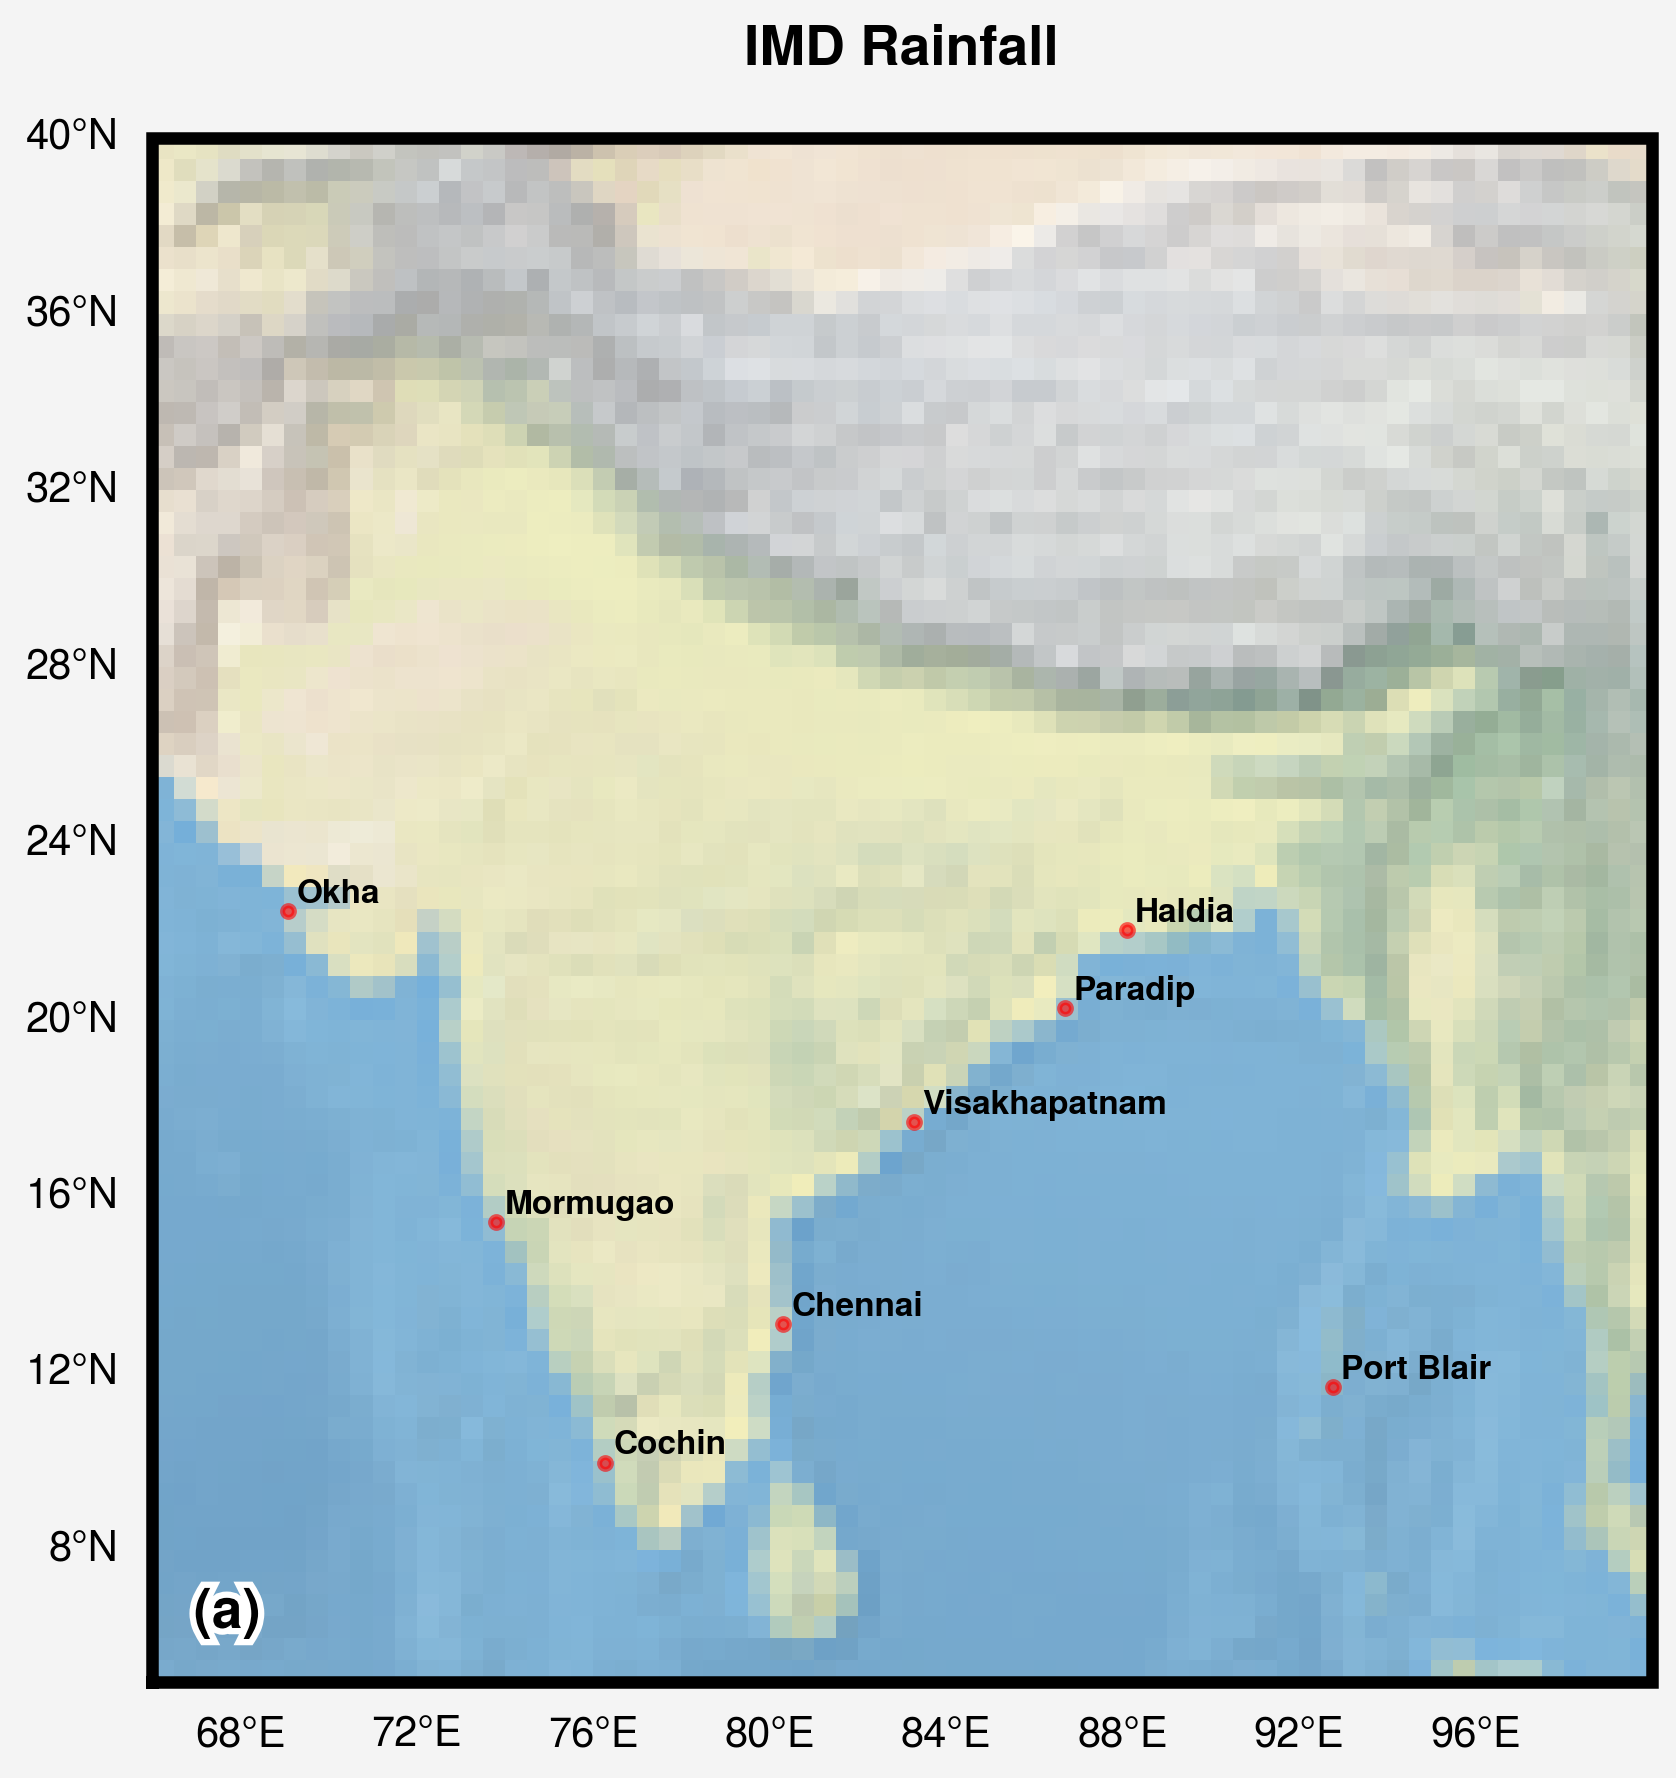

In [ ]:
fig, axs=plot.subplots(ncols=1,nrows=1, proj='cyl', dpi=300,
                       tight=True) 

##### proj = 'cyl' is the Cylindrical Equidistant Map projection used by Cartopy ###
#### dpi = 300 ( recommended ) , 600 , 1200 

lat_min = 5# Change accordingly
lat_max = 40 # lat max
lon_min = 66 ###
lon_max = 100
#levels=np.arange(0,10,1) # generates a sequence of numbers from 0 to 10 with  a spacing of 1
cm = 'RdYlBu' # Colormap 'rainbow' , 'viridis', 'RdYlBu', 'RdBu' etc..
ex= 'max' # Color bar arrow ,'min', 'max', 'none','both'

#Now, we can format all the axes at once using these commands
axs.format(lonlim=(lon_min, lon_max), 
           latlim=(lat_min, lat_max), 
           labels=True,
           innerborders=False, 
           latlines=4, lonlines=4,
           abc='(a)', abcloc='ll', 
           gridminor=False,
           suptitle='IMD Rainfall' )

geo_df.plot(ax=axs, c='red', alpha=0.6, markersize=2)

for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df['Station Name']):
    axs.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points",fontsize=4)
axs.stock_img()


